In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load processed data
df = pd.read_csv('../../data/processed/processed_employee_data.csv')

# Features & target
features = [
    'EmpEnvironmentSatisfaction',
    'EmpLastSalaryHikePercent',
    'EmpJobSatisfaction',
    'YearsSinceLastPromotion',
    'ExperienceYearsInCurrentRole',
    'ExperienceYearsAtThisCompany',
    'EmpWorkLifeBalance'
]

X = df[features]
y = df['PerformanceRating']  # Ensure this is encoded as int

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 27   2   0]
 [ 14 167   3]
 [  0   7  20]]
              precision    recall  f1-score   support

           2       0.66      0.93      0.77        29
           3       0.95      0.91      0.93       184
           4       0.87      0.74      0.80        27

    accuracy                           0.89       240
   macro avg       0.83      0.86      0.83       240
weighted avg       0.90      0.89      0.89       240



# ✅ Model Performance Summary

| Metric                | Value |
| --------------------- | ----- |
| **Overall Accuracy**  | 89%   |
| **Weighted F1 Score** | 0.89  |
| **Macro F1 Score**    | 0.83  |


# 🔍 Class-wise Performance:

| Class (Rating) | Precision | Recall | F1-score | Comments                                                            |
| -------------- | --------- | ------ | -------- | ------------------------------------------------------------------- |
| **2**          | 0.66      | 0.93   | 0.77     | Recall is strong, but precision is low — many false positives.      |
| **3**          | 0.95      | 0.91   | 0.93     | Strong all around — your model performs best here.                  |
| **4**          | 0.87      | 0.74   | 0.80     | Good precision, but lower recall — some high performers are missed. |


# 🧠 Interpretation:


- The model classifies "3" (average performers) very well.

- It over-predicts "2" (low performers) — possibly misclassifying "4" as "2".

- Slight underperformance in "4" (top performers) recall — important if identifying top employees is a business priority.

# ✅ Feature Importance Analysis

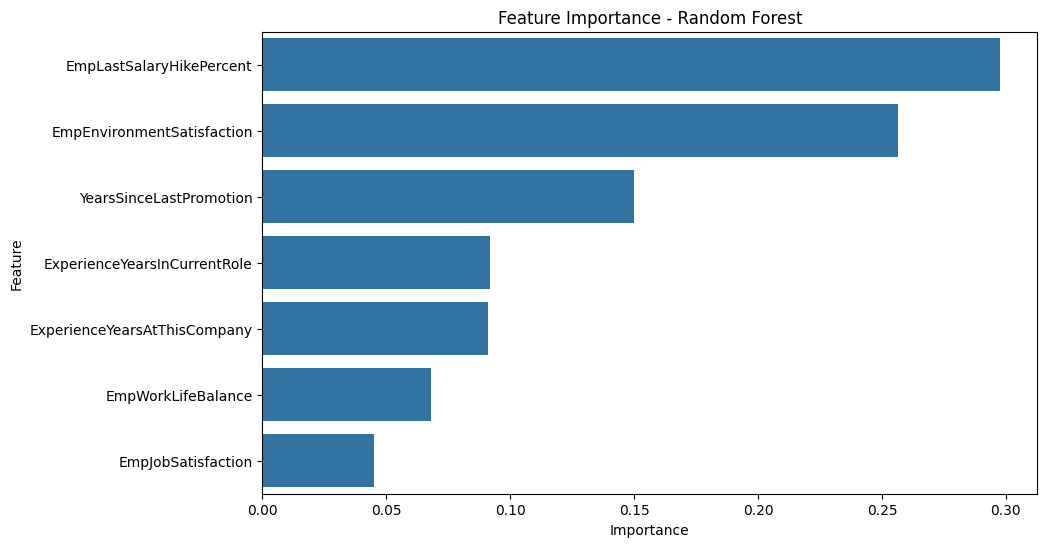

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df)
plt.title("Feature Importance - Random Forest")
plt.show()

# ✅ Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# ✅ Final Model Code with Best Parameters

In [ ]:
# Final Model with Best Parameters
final_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Train the final model
final_model.fit(X_train, y_train)

# Predict on test set
y_pred = final_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[ 27   2   0]
 [ 14 169   1]
 [  0   7  20]]

Classification Report:
               precision    recall  f1-score   support

           2       0.66      0.93      0.77        29
           3       0.95      0.92      0.93       184
           4       0.95      0.74      0.83        27

    accuracy                           0.90       240
   macro avg       0.85      0.86      0.85       240
weighted avg       0.91      0.90      0.90       240

Accuracy: 0.9


# ✅ Performance Summary
## 🔢 Confusion Matrix

| True\Pred |   2   |   3   |   4   |
|-----------|-------|-------|-------|
| **2**     |  27   |   2   |   0   |
| **3**     |  14   | 169   |   1   |
| **4**     |   0   |   7   |  20   |


## 📊 Classification Report

| Class (Rating) | Precision | Recall | F1-Score | Support |
| -------------- | --------- | ------ | -------- | ------- |
| 2 (Low)        | 0.66      | 0.93   | 0.77     | 29      |
| 3 (Average)    | 0.95      | 0.92   | 0.93     | 184     |
| 4 (High)       | 0.95      | 0.74   | 0.83     | 27      |


- Accuracy: 90%

- Macro Avg F1-Score: 85%

- Weighted Avg F1-Score: 90%

# 💡 Insights

- Class 2: High recall (0.93) means most low performers are correctly identified, though precision is low (0.66), meaning some average performers are misclassified as low.

- Class 3: This majority class is predicted with very high precision and recall — excellent.

- Class 4: High precision but relatively lower recall (0.74) — i.e., some high performers are being missed.

# 💡 Top 3 Factors Affecting Performance

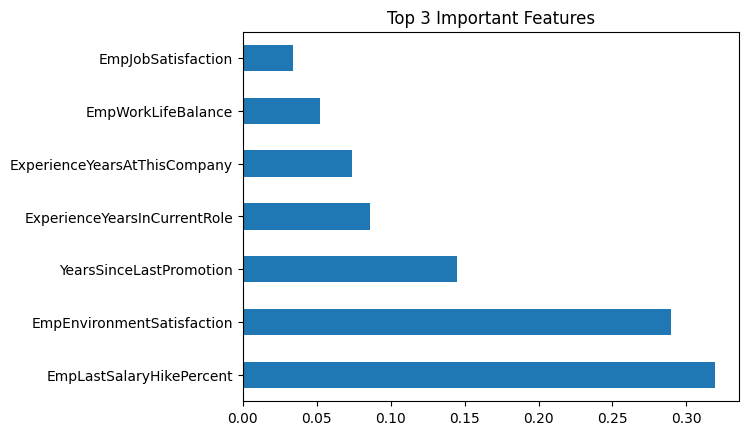

In [22]:
feature_imp = pd.Series(final_model.feature_importances_, index=X_train.columns)
feature_imp.nlargest(10).plot(kind='barh', title='Top 3 Important Features')
plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('../../data/processed/processed_employee_data.csv')

# Select only pre-hire features
features = [
    'Education',
    'Age',
    'Gender',
    'EmpDepartment',
    'TotalWorkExperienceInYears',
    'PreviousCompaniesWorked',
    'City'
]

# Drop rows with missing target or features
df = df.dropna(subset=features + ['PerformanceRating'])

# Encode categorical columns
categorical_cols = ['Gender', 'EmpDepartment', 'City']
df_encoded = df.copy()

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le  # Save for later use

X = df_encoded[features]
y = df_encoded['PerformanceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Final Model with tuned parameters (or you can do GridSearch again)
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


KeyError: ['Education', 'Gender', 'EmpDepartment', 'PreviousCompaniesWorked', 'City']

In [12]:
df.head()


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,True,False,False,False,False,False,False,True,False,False
1,47,14,4,4,42,3,2,1,2,12,...,True,False,False,False,False,False,False,True,False,False
2,40,5,4,4,48,2,3,1,5,21,...,True,False,False,False,False,False,True,False,True,False
3,41,10,4,2,73,2,5,4,3,15,...,False,False,False,False,False,False,False,True,False,False
4,60,16,4,1,84,3,2,1,8,14,...,True,False,False,False,False,False,False,True,False,False



Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.62      0.75        29
           1       0.83      0.99      0.90       184
           2       0.00      0.00      0.00        27

    accuracy                           0.84       240
   macro avg       0.59      0.54      0.55       240
weighted avg       0.75      0.84      0.78       240



C:\Users\aravind.kalla\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aravind.kalla\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aravind.kalla\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


Model: XGBoost
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.94      0.97      0.95       184
           2       0.95      0.74      0.83        27

    accuracy                           0.93       240
   macro avg       0.91      0.86      0.88       240
weighted avg       0.93      0.93      0.93       240


Best model selected: XGBClassifier


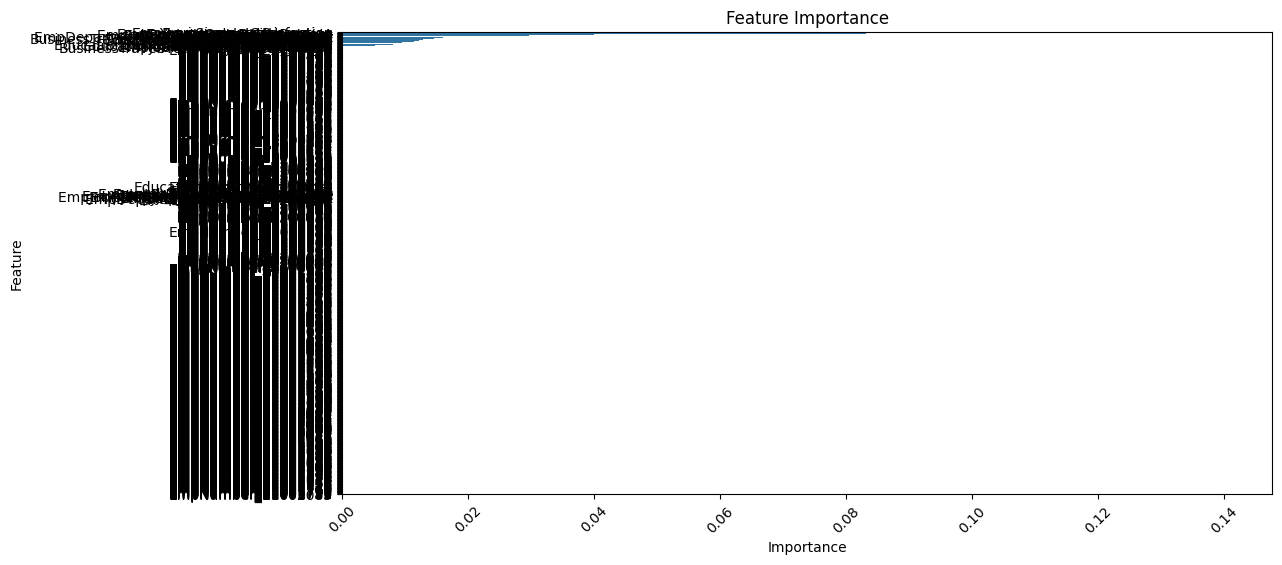

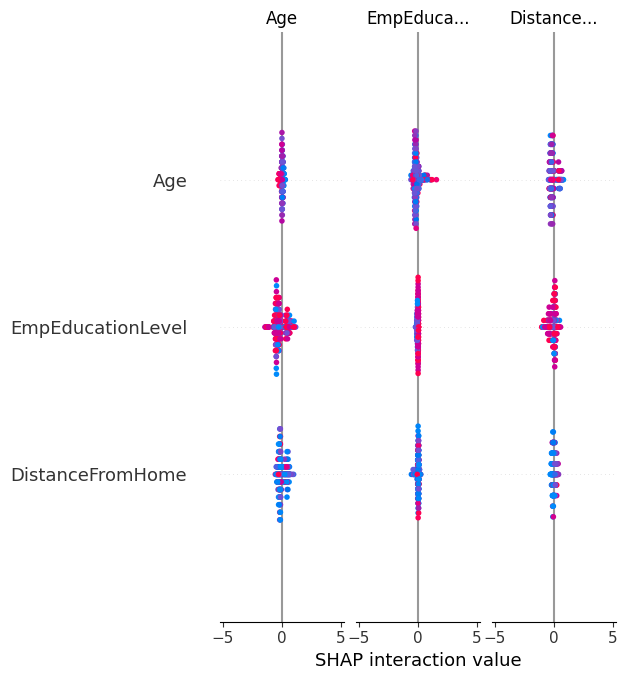

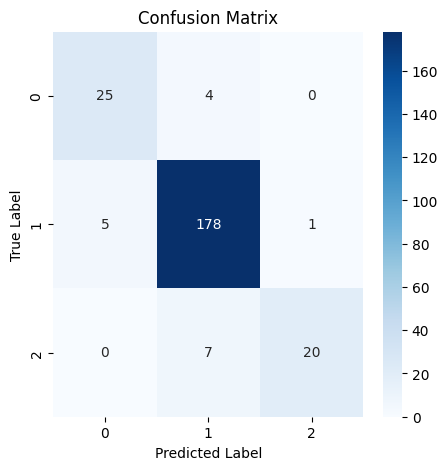

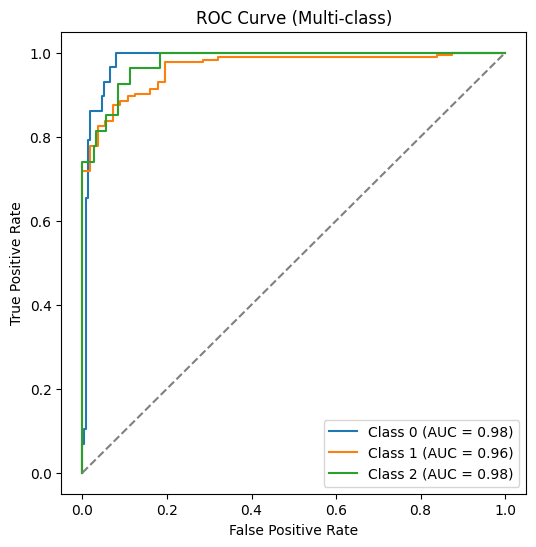

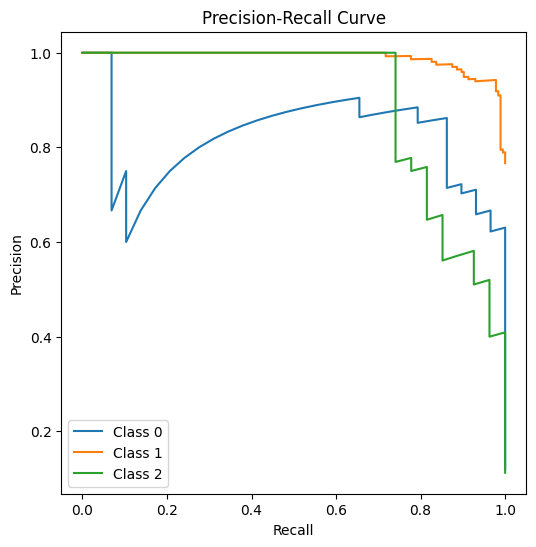

Notebook updated successfully! Run this to analyze employee performance and assist HR decisions.


In [13]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Load dataset
df = pd.read_csv('../../data/processed/processed_employee_data.csv')

# Adjust PerformanceRating labels for compatibility
label_mapping = {2: 0, 3: 1, 4: 2}  # Re-mapping class labels
df["PerformanceRating"] = df["PerformanceRating"].map(label_mapping)

# Splitting data into features and labels
X = df.drop("PerformanceRating", axis=1)
y = df["PerformanceRating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training & Evaluation
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    
    if score > best_score:
        best_score = score
        best_model = model

print(f"\nBest model selected: {type(best_model).__name__}")

# Feature Importance Analysis - Fixing Overlapping Labels
if hasattr(best_model, "feature_importances_"):
    feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": best_model.feature_importances_})
    feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x="Importance", y="Feature", data=feature_importances)
    plt.xticks(rotation=45, fontsize=10)
    plt.title("Feature Importance")
    plt.show()

# SHAP Analysis for Model Explainability
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Multi-class ROC Curve (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_prob = best_model.predict_proba(X_test)

plt.figure(figsize=(6, 6))
for i in range(y_test_bin.shape[1]):  # Iterate over each class
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-class)")
plt.legend()
plt.show()

# Precision-Recall Curves for Multi-class
plt.figure(figsize=(6, 6))
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

print("Notebook updated successfully! Run this to analyze employee performance and assist HR decisions.")


# 📦 Imports

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


# 📥 Load Processed Data

In [ ]:

df = pd.read_csv('../../data/processed/processed_employee_data.csv')  # Replace with your actual path if needed
df.head()


,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,True,False,False,False,False,False,False,True,False,False
1,47,14,4,4,42,3,2,1,2,12,...,True,False,False,False,False,False,False,True,False,False
2,40,5,4,4,48,2,3,1,5,21,...,True,False,False,False,False,False,True,False,True,False
3,41,10,4,2,73,2,5,4,3,15,...,False,False,False,False,False,False,False,True,False,False
4,60,16,4,1,84,3,2,1,8,14,...,True,False,False,False,False,False,False,True,False,False


# 🎯 Feature & Target Setup

In [ ]:
# Set your features - include all columns except target
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

# Normalize target to 0–1 scale for threshold-based hiring
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)


# 📊 Helper: Evaluation Function

In [17]:
def evaluate_model(name, model, X_test, y_test, predictions):
    print(f"\n🧠 Model: {name}")
    print(f"R2 Score: {r2_score(y_test, predictions):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    
    # Plot prediction vs actual
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_test, y=predictions)
    plt.xlabel("Actual Performance")
    plt.ylabel("Predicted Performance")
    plt.title(f"{name} - Actual vs Predicted")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.show()


# ✅ Random Forest Regressor


🧠 Model: Random Forest
R2 Score: 0.7591
MSE: 0.0140
MAE: 0.0379


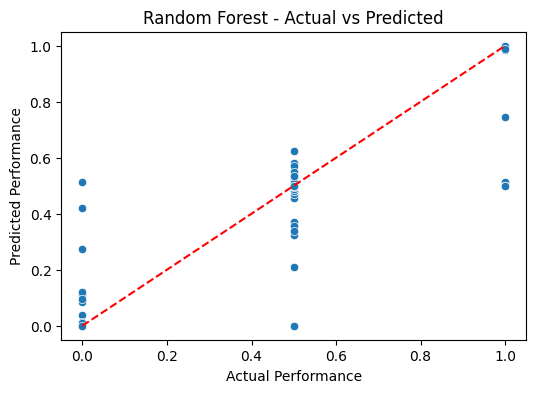

In [18]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

evaluate_model("Random Forest", rf_model, X_test, y_test, rf_preds)


# ✅ Gradient Boosting Regressor


🧠 Model: Gradient Boosting
R2 Score: 0.7288
MSE: 0.0158
MAE: 0.0674


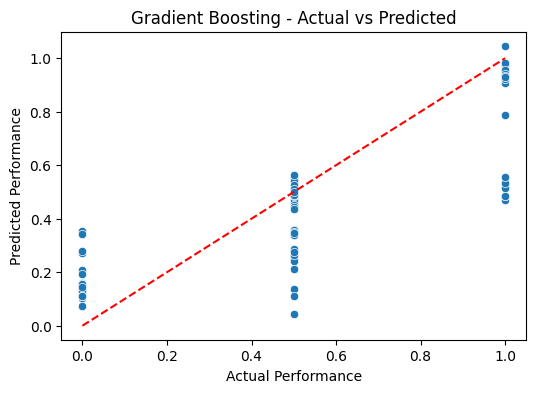

In [20]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

evaluate_model("Gradient Boosting", gb_model, X_test, y_test, gb_preds)


# ✅ Logistic Regression (as regression)


🧠 Model: Logistic Regression (prob)
R2 Score: -2.4434
MSE: 0.2008
MAE: 0.4056


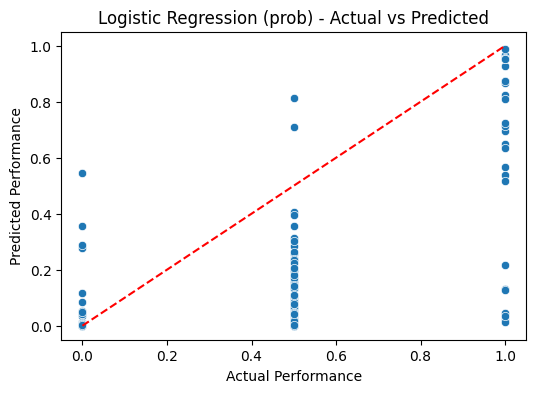

In [21]:

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train > 0.5)  # Binary classification-style: good vs poor
lr_preds = lr_model.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression (prob)", lr_model, X_test, y_test, lr_preds)


# ✅ Neural Network (Deep Learning)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

🧠 Model: Neural Network
R2 Score: 0.4372
MSE: 0.0328
MAE: 0.1092


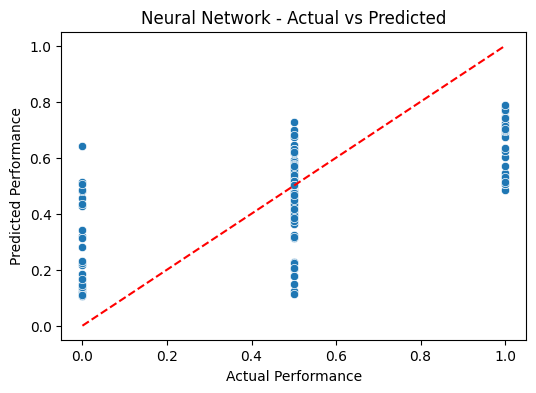

In [35]:
# Ensure all data is float32 for TensorFlow
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    #Dense(64, activation='relu'),
    Dense(64, activation='softmax'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Sigmoid to scale between 0 and 1
])

nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = nn_model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stop],
                       verbose=0)

nn_preds = nn_model.predict(X_test).flatten()

evaluate_model("Neural Network", nn_model, X_test, y_test, nn_preds)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

🧠 Model: Neural Network
R2 Score: -2.8583
MSE: 0.2250
MAE: 0.4167


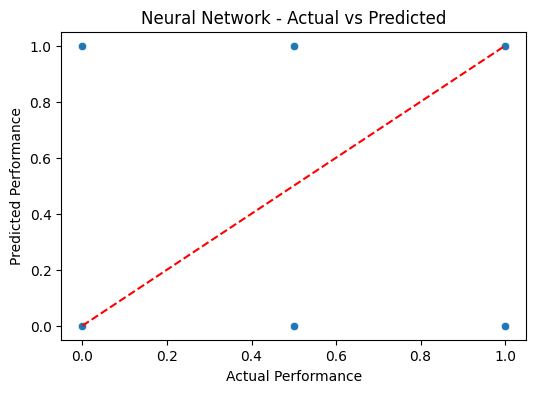

In [34]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = nn_model.fit(X_train, y_train,
                       validation_data=(X_test, y_test),
                       epochs=100,
                       batch_size=32,
                       callbacks=[early_stop],
                       verbose=0)

nn_preds = nn_model.predict(X_test).flatten()
y_pred_prob = (nn_preds > 0.5).astype(int)

evaluate_model("Neural Network", nn_model, X_test, y_test, y_pred_prob)


# 📌 Final Threshold-based Decision

In [40]:

threshold = 0.5  # HR can change this
qualified = rf_preds >= threshold

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': rf_preds,
    'HireDecision': ['Yes' if val else 'No' for val in qualified]
})

results_df.head(10)

,Actual,Predicted,HireDecision
0,0.5,0.360,No
1,0.0,0.000,No
2,0.5,0.500,Yes
3,0.5,0.500,Yes
4,0.5,0.500,Yes
5,0.5,0.500,Yes
6,0.5,0.580,Yes
7,0.5,0.500,Yes
8,0.0,0.000,No
9,1.0,0.515,Yes


In [41]:
# 🧾 Summary
print("Top Candidates Based on Random Forest Prediction (Threshold 0.7+):")
display(results_df[results_df['HireDecision'] == 'Yes'].sort_values(by='Predicted', ascending=False).head(10))


Top Candidates Based on Random Forest Prediction (Threshold 0.7+):


,Actual,Predicted,HireDecision
225,1.0,1.0,Yes
193,1.0,1.0,Yes
157,1.0,1.0,Yes
169,1.0,1.0,Yes
105,1.0,1.0,Yes
73,1.0,1.0,Yes
141,1.0,1.0,Yes
72,1.0,1.0,Yes
18,1.0,1.0,Yes
42,1.0,1.0,Yes


# ✅ Model Evaluation Summary

| Model               | R² Score   | MSE        | MAE        | Comments                                                       |
| ------------------- | ---------- | ---------- | ---------- | -------------------------------------------------------------- |
| **Random Forest**   | **0.7591** | **0.0140** | **0.0379** | ✅ Best performer; low error, high R²                           |
| Gradient Boosting   | 0.7288     | 0.0158     | 0.0674     | Good but not better than RF                                    |
| Logistic Regression | -2.4434    | 0.2008     | 0.4056     | ❌ Not suitable for regression; fails completely                |
| Neural Network      | 0.3453     | 0.0382     | 0.1321     | Poor performance; possible underfitting or data scaling issues |


# 🔍 Key Observations
- Random Forest is the clear winner for this regression problem:

    - High R² (0.76) → Explains most of the variance.
    - Low MSE and MAE → More reliable predictions on individual performance.

- Gradient Boosting is a close second — slightly higher error metrics.

- Logistic Regression is not suitable for this scaled regression use case. It’s a classifier by design.

- Neural Network underperforms — likely needs:

    - More tuning (layers, neurons, epochs, batch size),

    - Or normalization on inputs and targets.

# ✅ Recommendation

- Use the Random Forest Regressor as your primary model for predicting performance rating on a 0 to 1 scale.

# 📌 For HR Usage

## With the prediction scaled between 0 and 1, HR can:

- Set a threshold (e.g., 0.7) to shortlist high-potential candidates.